In [4]:
import pandas as pd

# Load data
df = pd.read_csv("final_data.csv")

In [5]:
import os
import random

# Create list of tuples of images + corresponding sentences
data = []
folder_path = "../Project/Spectrograms_unpadded"
for image in os.listdir(folder_path):
  sentence = df[df['path'] == image[:-4] + '.mp3']['sentence'].item()
  data.append((folder_path + "/" + image, sentence))

random.seed(42)  # Shuffle the data for randomness
random.shuffle(data)

In [6]:
from torch.utils.data import random_split

# Split into train, validation and test
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))
test_size = len(data) - train_size - val_size

train_data, val_data, test_data = random_split(data, [train_size, val_size, test_size])

In [7]:
# ASRDataset class to convert data to a proper dataset for CNN
from PIL import Image
from torch.utils.data import Dataset

class ASRDataset(Dataset):
    def __init__(self, data, transform):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, sentence = self.data[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, sentence

In [8]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

train_data = ASRDataset(train_data, transform=transform)
val_data = ASRDataset(val_data, transform=transform)
test_data = ASRDataset(test_data, transform=transform)

In [9]:
for i, (x, t) in enumerate(train_data):
  if i > 10:
    break
  print(x.shape, t)

torch.Size([3, 128, 128]) Economic activity in the commune is mainly agricultural.
torch.Size([3, 128, 128]) In prokaryotes, regulator genes often code for repressor proteins.
torch.Size([3, 128, 128]) Heroicus includes Achilles' "Ode to Echo".
torch.Size([3, 128, 128]) Sako Shahinian is an artist designer with a multi disciplinary background.
torch.Size([3, 128, 128]) Their mascot is the Knights and their school colors are navy blue and gold.
torch.Size([3, 128, 128]) The towns also experienced repopulation.
torch.Size([3, 128, 128]) The show awards prizes to individuals and groups that donate the most food.
torch.Size([3, 128, 128]) Leaving Bengal, Halhed went to Holland, and on to London.
torch.Size([3, 128, 128]) The last assessment revolves around the territorial and social disparities in terms of health.
torch.Size([3, 128, 128]) The county seat is Channing.
torch.Size([3, 128, 128]) A player can also lose if they must draw from an empty deck.


In [10]:
# the following code is to tokenize all of our data
# (code was pulled from lab 10)

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# we will *tokenize* each word by using a tokenzier from
# https://pytorch.org/text/stable/data_utils.html#get-tokenizer

tokenizer = get_tokenizer("basic_english")
train_data_words = [tokenizer(t) for x, t in train_data]

# build the vocabulary object. the parameters to this function
# is described below
vocab = build_vocab_from_iterator(train_data_words,
                                  specials=['<bos>', '<eos>', '<unk>', '<pad>'],
                                  min_freq=10)

# set the index of a word not in the vocabulary
vocab.set_default_index(2) # this is the index of the `<unk>` keyword


def convert_indices(data, vocab):
    """Convert data of form [(tweet, label)...] where tweet is a string
    into an equivalent list, but where the tweets represented as a list
    of word indices.
    """
    # return [(vocab.forward(images, tokenizer(f'<bos> {label} <eos>')))
    #         for (image, label) in data]
    return [(image, vocab.forward(tokenizer(f'<bos> {label} <eos>')))
            for (image, label) in data]

train_data_indices = convert_indices(train_data, vocab)
val_data_indices = convert_indices(val_data, vocab)
test_data_indices = convert_indices(test_data, vocab)

/home/kermina/School/venv/lib/python3.12/site-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/kermina/School/venv/lib/python3.12/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/kermina/School/venv/lib/python3.12/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT 

In [11]:
print(train_data_indices[0])
print(train_data_indices[0][0].shape)

(tensor([[[0.2667, 0.2667, 0.2667,  ..., 0.2667, 0.2667, 0.2667],
         [0.2667, 0.2667, 0.2667,  ..., 0.2667, 0.2667, 0.2667],
         [0.2667, 0.2667, 0.2667,  ..., 0.2667, 0.2667, 0.2667],
         ...,
         [0.2667, 0.2627, 0.2588,  ..., 0.2706, 0.2706, 0.2667],
         [0.2667, 0.2745, 0.2745,  ..., 0.2667, 0.2667, 0.2667],
         [0.2667, 0.2745, 0.2745,  ..., 0.2667, 0.2667, 0.2667]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.0196, 0.1725, 0.2235,  ..., 0.0157, 0.0235, 0.0039],
         [0.0157, 0.1216, 0.1294,  ..., 0.0039, 0.0078, 0.0039],
         [0.0118, 0.0902, 0.0588,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.3294, 0.3294, 0.3294,  ..., 0.3294, 0.3294, 0.3294],
         [0.3294, 0.3294, 0.3294,  ..., 0.3294, 0.3294, 0.3294],
         [0.3294, 0.3294, 0.3294,  ..., 0.3294, 0.3294, 0

In [12]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.get_default_device()

In [13]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def collate_batch(batch):
    """
    Returns the input and target tensors for a batch of data

    Parameters:
        `batch` - An iterable data structure of tuples (indices, label),
                  where `indices` is a sequence of word indices, and
                  `label` is either 1 or 0.

    Returns: a tuple `(X, t)`, where
        - `X` is a PyTorch tensor of shape (batch_size, sequence_length)
        - `t` is a PyTorch tensor of shape (batch_size)
    where `sequence_length` is the length of the longest sequence in the batch
    """
    image_list = []  # collect each sample's spectrogram
    label_list = [] # collect each sample's target labels
    input_length = [] # collect length of each spectogram (before padding)
    label_length = [] # collect length of each label (before padding)

    for (image, label) in batch:
      image = image.squeeze(0).transpose(0,1)
      image_list.append(image)
      input_length.append(image.shape[0]//2)

      label_list.append(torch.tensor(label))
      label_length.append(len(label))

    t = pad_sequence(label_list, padding_value=3, batch_first=True).to(device)
    # X = pad_sequence(image_list, batch_first=True).unsqueeze(1).transpose(2, 3)
    X = pad_sequence(image_list, batch_first=True).transpose(1, 2).to(device)
    # X = pad_sequence(image_list, padding_value=0).transpose(0,1)
    return X, t, input_length, label_length


train_dataloader = DataLoader(train_data_indices, batch_size=10, shuffle=True,
                              collate_fn=collate_batch)

In [14]:
for i, (X, t, input_length, label_length) in enumerate(train_dataloader):
    print(X.shape, t.shape, input_length, label_length)
    break

print(X[0].shape)

torch.Size([10, 3, 128, 128]) torch.Size([10, 18]) [64, 64, 64, 64, 64, 64, 64, 64, 64, 64] [16, 10, 11, 16, 12, 11, 9, 16, 18, 11]
torch.Size([3, 128, 128])


In [15]:
len(vocab)

1002

In [16]:
from torch import nn

class ASR(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=(5, 3), padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),

            nn.Conv2d(128, 256, kernel_size=(5, 3), padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),

            nn.Conv2d(256, 384, kernel_size=(3, 3), padding='same'),
            nn.ReLU(),

            nn.Conv2d(384, 384, kernel_size=(3, 3), padding='same'),
            nn.ReLU(),
        )

        num_classes = len(vocab)
        self.dense_layers = nn.Sequential(
            nn.Linear(384 * 32, 1024),  # Flatten size calculated from CNN output
            nn.ReLU(),
            nn.Linear(1024, 128),
            nn.ReLU()
        )
        # Batch normalization
        # RNN layers
        self.rnn = nn.RNN(128, 256, batch_first=True, num_layers=2)
        # Output layer
        self.output_layer = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.cnn_layers(x)
        if x.ndim < 4:
            x = x.view(1, x.shape[1], x.shape[0] * x.shape[2])
        else:
            x = x.view(x.shape[0], x.shape[2], x.shape[1] * x.shape[3])
        x = self.dense_layers(x)
        x, _ = self.rnn(x)
        x = self.output_layer(x)
        return x

In [17]:
def GreedyDecoder(output, labels, label_lengths, blank_label=3, collapse_repeated=True):
    """
    Decodes the model's output to text using a greedy approach.

    Parameters:
        - output: The logits output from the model of shape (batch_size, seq_length, num_classes)
        - labels: The ground truth labels of shape (batch_size, max_label_length)
        - label_lengths: A list of lengths for each ground truth label sequence
        - blank_label: The index of the blank label in the vocabulary
        - collapse_repeated: Whether to collapse repeated predictions into a single label

    Returns:
        - decodes: A list of decoded strings from the model's output
        - targets: A list of target strings corresponding to the ground truth labels
    """

    arg_maxes = torch.argmax(output, dim=2)  # Get the most likely class at each timestep
    decodes = []
    targets = []

    for i, args in enumerate(arg_maxes):
        decode = []
        # Convert ground truth indices to text
        target_indices = labels[i][:label_lengths[i]].tolist()
        targets.append(" ".join(vocab.lookup_tokens(target_indices)))  # Convert indices to words

        for j, index in enumerate(args):
            if index != blank_label:  # Ignore blank labels
                if collapse_repeated and j != 0 and index == args[j - 1]:
                    continue  # Skip repeated predictions
                decode.append(index.item())

        # Convert decoded indices to text
        decodes.append(" ".join(vocab.lookup_tokens(decode)))

    return decodes, targets

In [18]:
from jiwer import wer

def compute_Wacc(output, labels, label_lengths):
    # Decode the predictions
    decodes, targets = GreedyDecoder(output, labels, label_lengths)
    error = wer(targets, decodes)
    return 1 - error

In [19]:
from matplotlib import pyplot as plt
from datetime import datetime

def train_model(model,                # a PyTorch model
                train_data,           # training data
                val_data,             # validation data
                learning_rate=1e-2,
                batch_size=10,
                num_epochs=45,
                plot_every=20,        # how often (in # iterations) to track metrics
                plot=True,            # whether to plot the training curve
                file_prefix=None,     # the prefix for saved files (None will just save the date and time)
                plot_name=None):      # added to the plot
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               collate_fn=collate_batch,
                                               shuffle=True) # reshuffle minibatches every epoch
    val_loader = torch.utils.data.DataLoader(val_data,
                                               batch_size=batch_size,
                                               collate_fn=collate_batch,
                                               shuffle=True) # reshuffle minibatches every epoch

    ctcloss = nn.CTCLoss(blank=3)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # these lists will be used to track the training progress
    # and to plot the training curve
    iters, train_loss, train_acc, val_acc = [], [], [], []
    iter_count = 0 # count the number of iterations that has passed

    best_ta = float('-inf')
    best_va = float('-inf')

    for e in range(num_epochs):
        for images, labels, input_lengths, label_lengths in train_loader:
            z = model(images).transpose(0, 1)
            log_prob = z.log_softmax(2)
            input_lengths = torch.full(size=(z.shape[1],), fill_value=z.shape[0], dtype=torch.int32).tolist()
            # Compute loss and do backwards pass
            loss = ctcloss(log_prob, labels, input_lengths, label_lengths) # will need to fix based on the parameters to ctc loss
            loss.backward()

            # Adjust weights
            optimizer.step()
            optimizer.zero_grad()

            # remaining is for computing accuracy

            if iter_count % plot_every == 0:
                iters.append(iter_count)
                ta = compute_Wacc(z.transpose(0, 1), labels, label_lengths)
                val_images, val_labels, _, val_label_lengths = next(iter(val_loader))
                va = compute_Wacc(model(val_images), val_labels, val_label_lengths)
                train_loss.append(float(loss))
                train_acc.append(ta)
                val_acc.append(va)
                print(iter_count, "Loss:", float(loss), "Train Acc:", ta, "Val Acc:", va)
                if ta > best_ta:
                    best_ta = ta
                if va > best_va:
                    best_va = va
            
            iter_count += 1

    if plot:
        if file_prefix is None:
            file_prefix = datetime.now().strftime("%Y-%m-%d_%I-%M-%S-%p")

        plt.figure()
        plt.plot(iters[:len(train_loss)], train_loss)
        plt.title(f'Loss over iterations ({plot_name})')
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.savefig(f'{file_prefix}_loss.png')

        plt.figure()
        plt.plot(iters[:len(train_acc)], train_acc)
        plt.plot(iters[:len(val_acc)], val_acc)
        plt.title(f'Accuracy over iterations ({plot_name})')
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.legend(["Train", "Validation"])
        plt.savefig(f'{file_prefix}_accuracy.png')

        with open(f'{file_prefix}_best_acc.txt', 'w') as f:
            f.writelines([f'Best TA: {best_ta}', f'Best VA: {best_va}'])

In [17]:
model_asr = ASR()
model_asr(train_data_indices[0][0])

tensor([[[-0.0101, -0.0324,  0.0653,  ...,  0.0789, -0.0085, -0.1005],
         [-0.0057, -0.0304,  0.0646,  ...,  0.1036, -0.0221, -0.0988],
         [ 0.0069, -0.0309,  0.0511,  ...,  0.1096, -0.0156, -0.1064],
         ...,
         [ 0.0090, -0.0302,  0.0426,  ...,  0.1275, -0.0208, -0.0994],
         [ 0.0093, -0.0300,  0.0419,  ...,  0.1282, -0.0210, -0.0993],
         [ 0.0084, -0.0294,  0.0422,  ...,  0.1277, -0.0214, -0.0993]]],
       grad_fn=<ViewBackward0>)

0 Loss: 15.224822998046875 Train Acc: 0.0 Val Acc: 0.0
1000 Loss: 3.5818169116973877 Train Acc: 0.34558823529411764 Val Acc: 0.3402777777777778
2000 Loss: 3.4661011695861816 Train Acc: 0.3858267716535433 Val Acc: 0.34507042253521125
3000 Loss: 3.2699337005615234 Train Acc: 0.375 Val Acc: 0.34751773049645385
4000 Loss: 3.2893173694610596 Train Acc: 0.31818181818181823 Val Acc: 0.3560606060606061
5000 Loss: 3.7274892330169678 Train Acc: 0.32167832167832167 Val Acc: 0.359375
6000 Loss: 3.2499771118164062 Train Acc: 0.33108108108108103 Val Acc: 0.368421052631579
7000 Loss: 3.726989507675171 Train Acc: 0.31612903225806455 Val Acc: 0.3202614379084967
8000 Loss: 3.2361698150634766 Train Acc: 0.3356643356643356 Val Acc: 0.38095238095238093
9000 Loss: 3.654924154281616 Train Acc: 0.3615384615384616 Val Acc: 0.390625
10000 Loss: 3.222134828567505 Train Acc: 0.3712121212121212 Val Acc: 0.3426573426573427
11000 Loss: 3.6984729766845703 Train Acc: 0.32867132867132864 Val Acc: 0.31690140845070425
12

/tmp/ipykernel_33681/757486451.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


0 Loss: 16.630359649658203 Train Acc: 0.0 Val Acc: 0.0
20 Loss: 3.959184408187866 Train Acc: 0.07511737089201875 Val Acc: 0.07079646017699115
40 Loss: 4.111227989196777 Train Acc: 0.0730593607305936 Val Acc: 0.07459207459207462
60 Loss: 3.967745780944824 Train Acc: 0.07048458149779735 Val Acc: 0.06911447084233258
80 Loss: 4.084356307983398 Train Acc: 0.07565011820330969 Val Acc: 0.0717488789237668
100 Loss: 3.8084092140197754 Train Acc: 0.07785888077858882 Val Acc: 0.07126948775055675
120 Loss: 3.887645721435547 Train Acc: 0.07785888077858882 Val Acc: 0.07373271889400923
140 Loss: 3.9200706481933594 Train Acc: 0.07223476297968401 Val Acc: 0.07322654462242562
160 Loss: 4.03668737411499 Train Acc: 0.07424593967517401 Val Acc: 0.06837606837606836


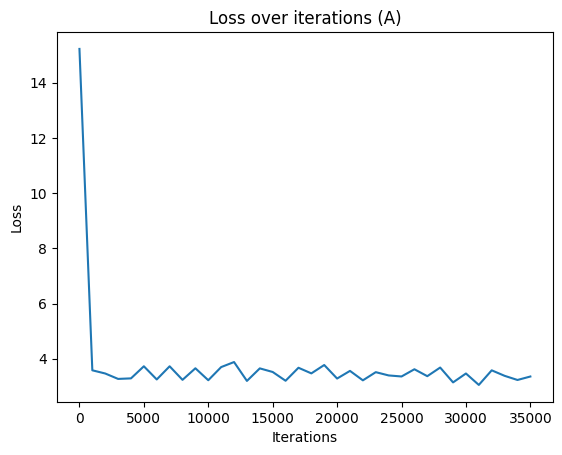

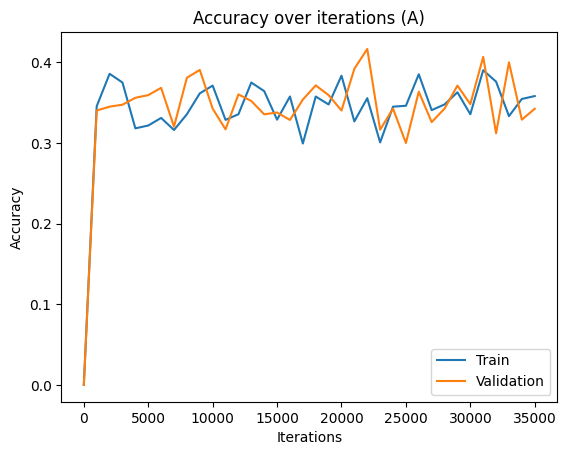

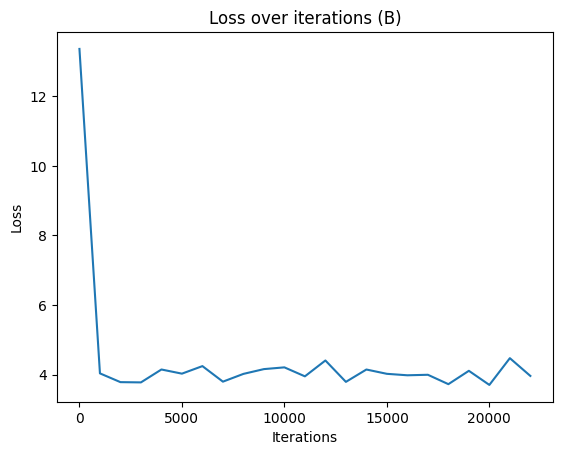

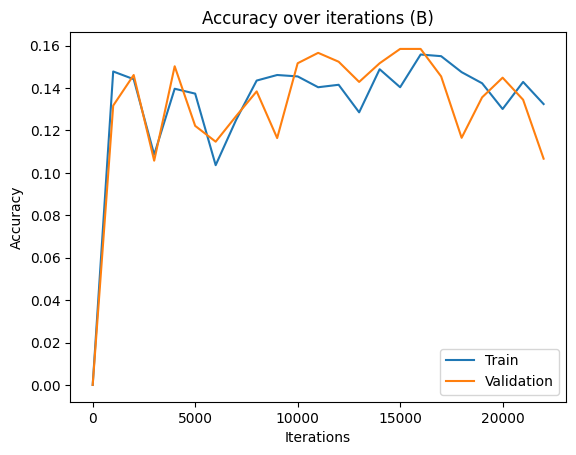

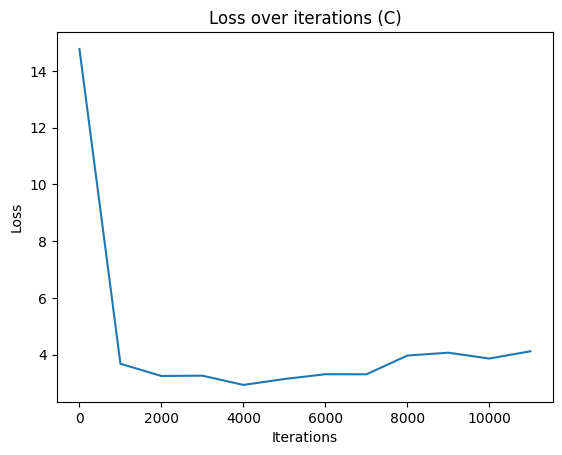

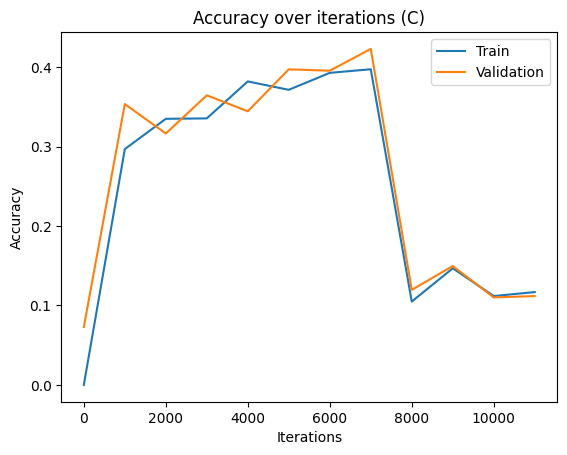

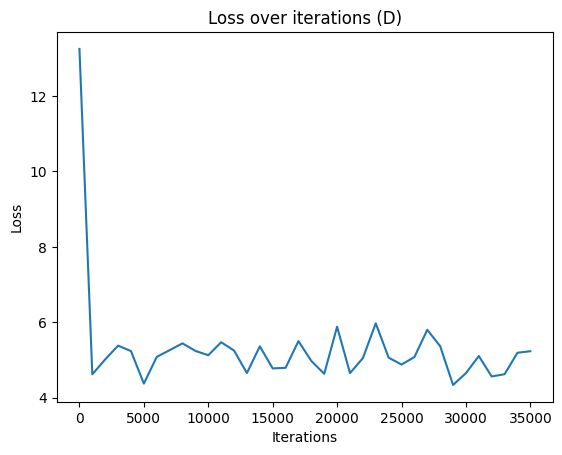

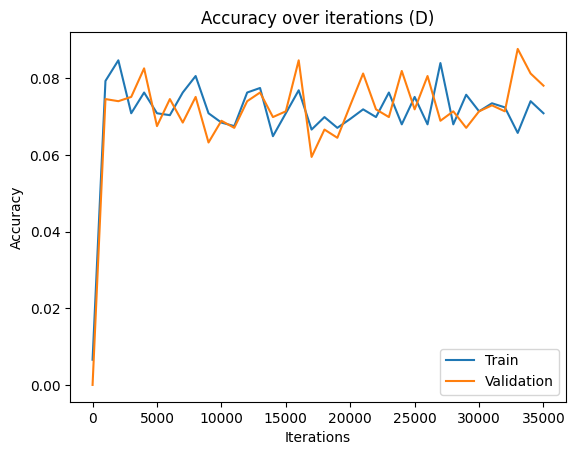

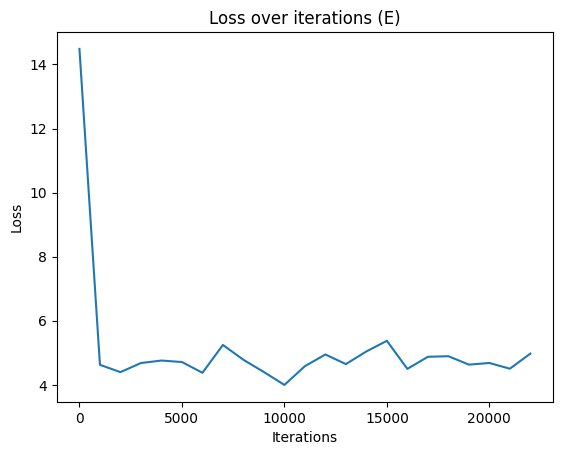

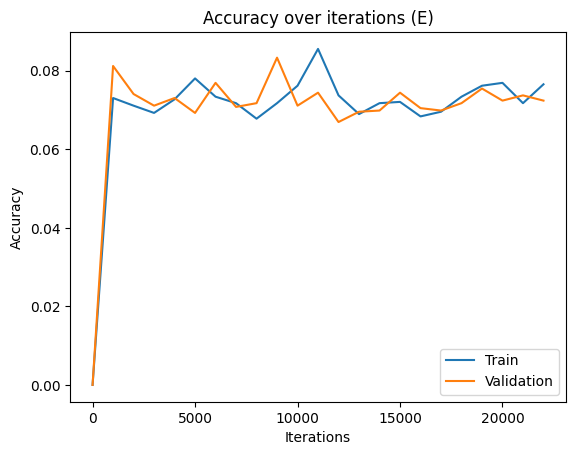

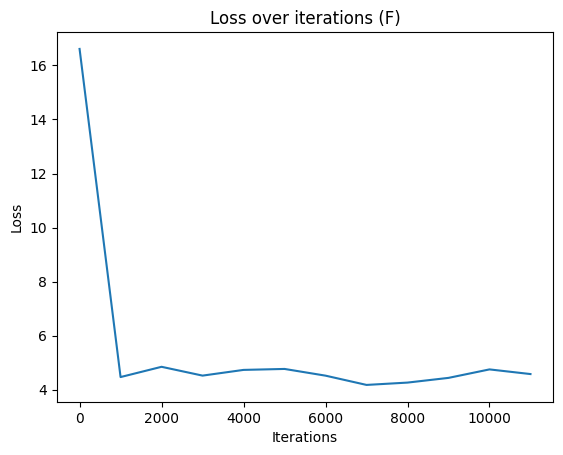

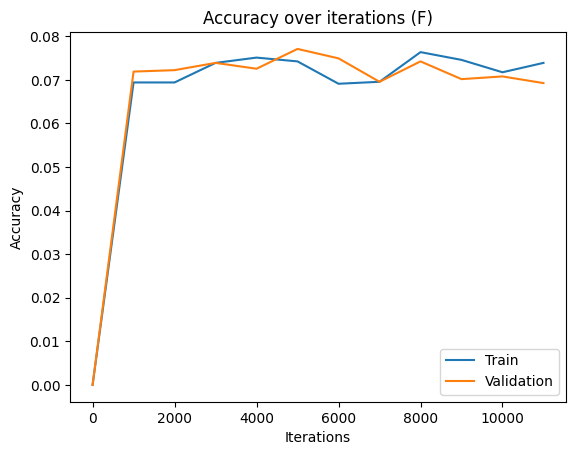

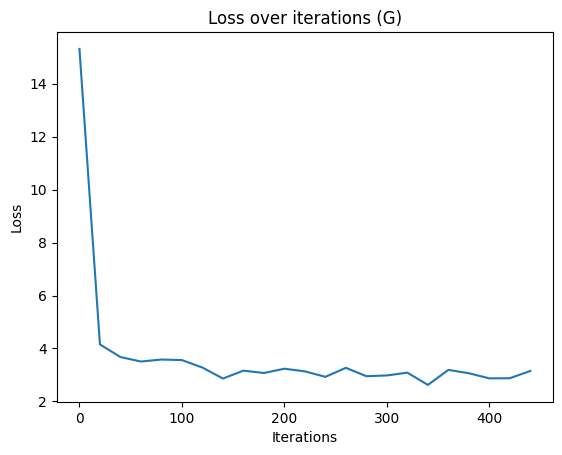

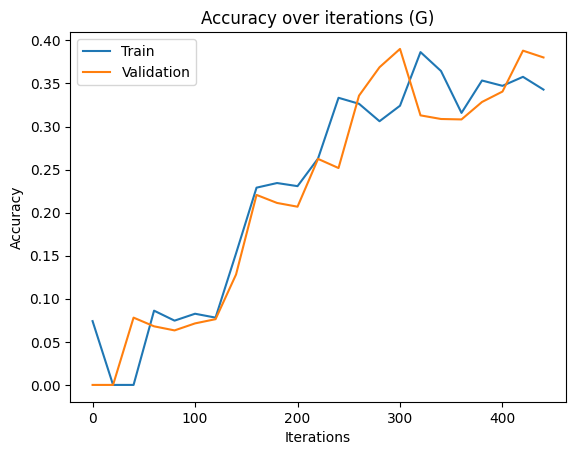

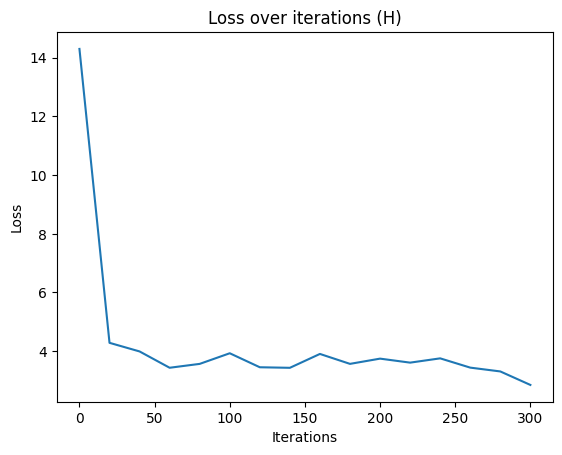

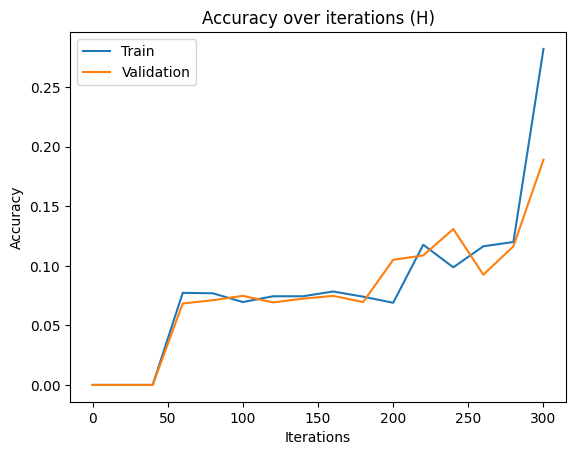

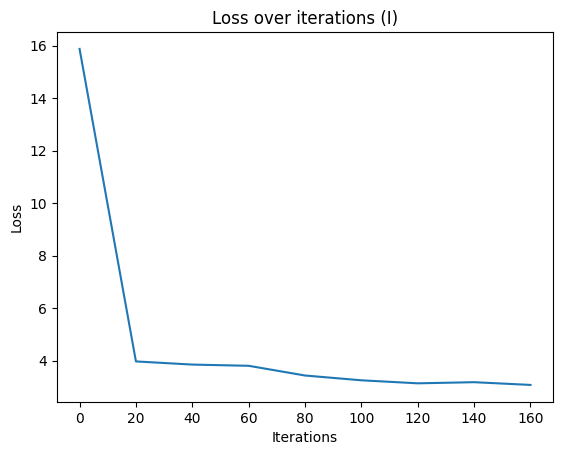

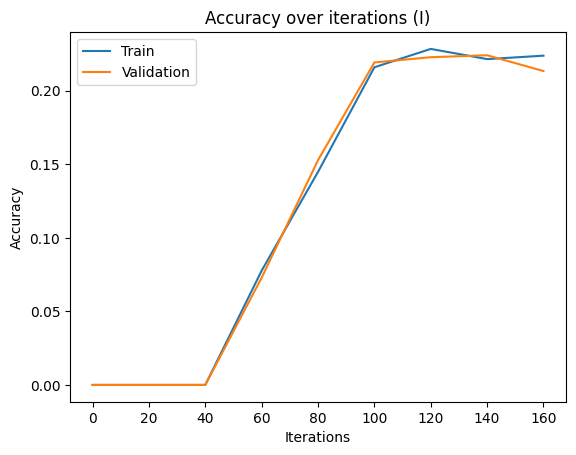

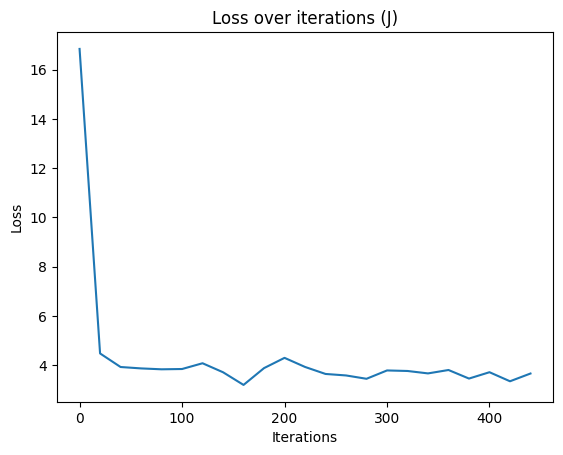

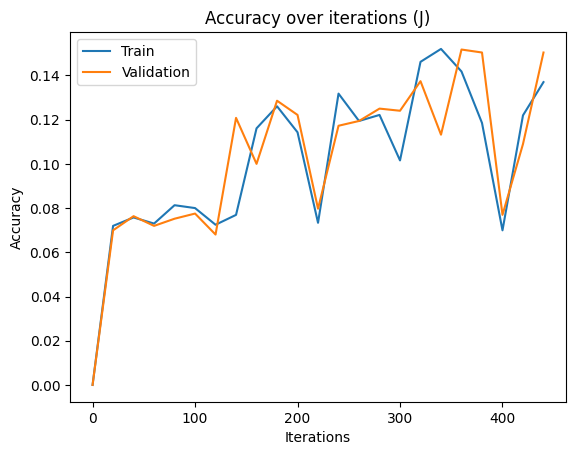

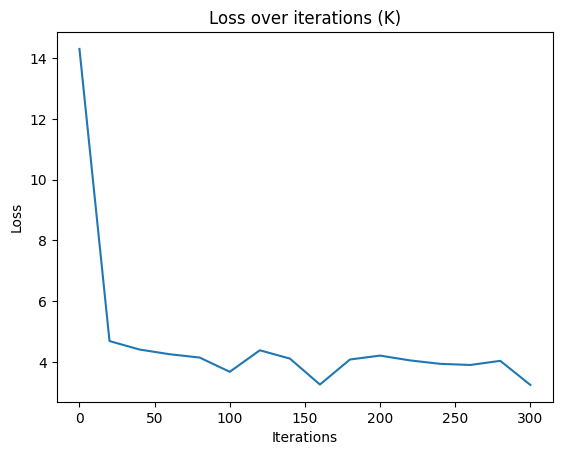

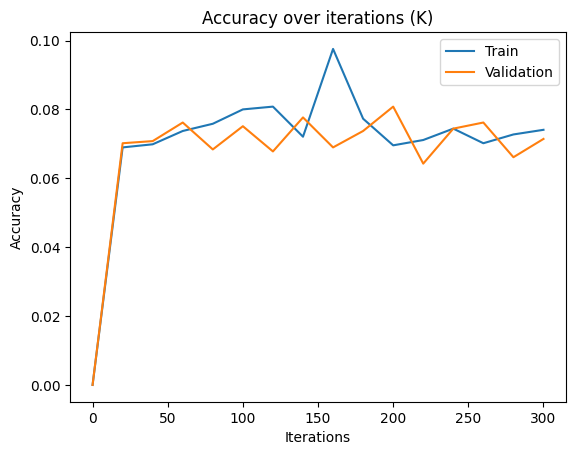

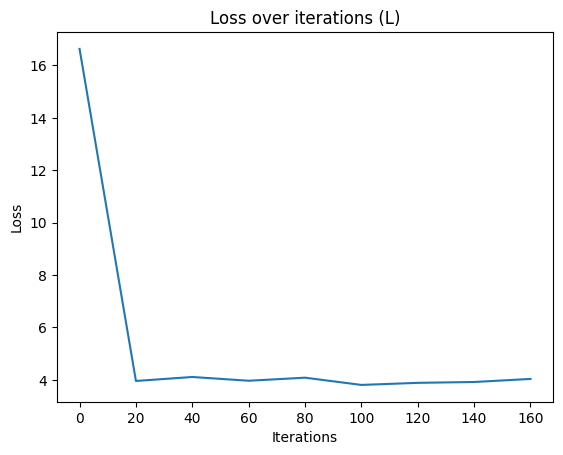

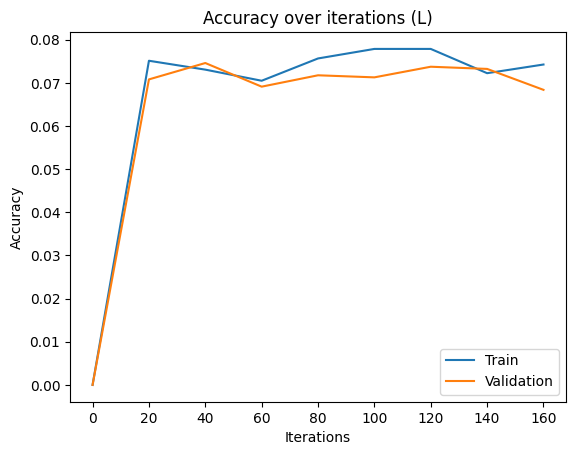

In [18]:
models = []
for tr, va, lr, bs, fp, pe, pn in [
    (train_data_indices, val_data_indices, 1e-3, 10, 'full-dataset_lr=1e-3_bs=10', 1000, 'A'),
    (train_data_indices, val_data_indices, 1e-3, 16, 'full-dataset_lr=1e-3_bs=16', 1000, 'B'),
    (train_data_indices, val_data_indices, 1e-3, 32, 'full-dataset_lr=1e-3_bs=32', 1000, 'C'),
    (train_data_indices, val_data_indices, 1e-2, 10, 'full-dataset_lr=1e-2_bs=10', 1000, 'D'),
    (train_data_indices, val_data_indices, 1e-2, 16, 'full-dataset_lr=1e-2_bs=16', 1000, 'E'),
    (train_data_indices, val_data_indices, 1e-2, 32, 'full-dataset_lr=1e-2_bs=32', 1000, 'F'),
    (train_data_indices[:100], val_data_indices[:100], 1e-3, 10, 'partial-dataset_lr=1e-3_bs=10', 20, 'G'),
    (train_data_indices[:100], val_data_indices[:100], 1e-3, 16, 'partial-dataset_lr=1e-3_bs=16', 20, 'H'),
    (train_data_indices[:100], val_data_indices[:100], 1e-3, 32, 'partial-dataset_lr=1e-3_bs=32', 20, 'I'),
    (train_data_indices[:100], val_data_indices[:100], 1e-2, 10, 'partial-dataset_lr=1e-2_bs=10', 20, 'J'),
    (train_data_indices[:100], val_data_indices[:100], 1e-2, 16, 'partial-dataset_lr=1e-2_bs=16', 20, 'K'),
    (train_data_indices[:100], val_data_indices[:100], 1e-2, 32, 'partial-dataset_lr=1e-2_bs=32', 20, 'L')]:
    model_asr = ASR().to(device)
    train_model(model_asr, tr, va, learning_rate=lr, batch_size=bs, file_prefix=fp, plot_every=pe, plot_name=pn)
    models += [(pn, model_asr)]

In [19]:
import pickle

with open('models.pickle', 'wb') as f:
    pickle.dump(models, f)

In [20]:
from torch import nn

class ASR_Alt_RNN(nn.Module):
    def __init__(self, rnn_type, dropout=0):
        super().__init__()
        # Convolutional layers
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=(5, 3), padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),

            nn.Conv2d(128, 256, kernel_size=(5, 3), padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),

            nn.Conv2d(256, 384, kernel_size=(3, 3), padding='same'),
            nn.ReLU(),

            nn.Conv2d(384, 384, kernel_size=(3, 3), padding='same'),
            nn.ReLU(),
        )

        num_classes = len(vocab)
        self.dense_layers = nn.Sequential(
            nn.Linear(384 * 32, 1024),  # Flatten size calculated from CNN output
            nn.ReLU(),
            nn.Linear(1024, 128),
            nn.ReLU()
        )
        # Batch normalization
        # RNN layers
        if rnn_type == 'GRU':
            self.rnn = nn.GRU(128, 256, batch_first=True, num_layers=2, dropout=dropout)
        elif rnn_type == 'LSTM':
            self.rnn = nn.LSTM(128, 256, batch_first=True, num_layers=2, dropout=dropout)
        else:
            raise ValueError('type should be either GRU or LSTM')
        # Output layer
        self.output_layer = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.cnn_layers(x)
        if x.ndim < 4:
            x = x.view(1, x.shape[1], x.shape[0] * x.shape[2])
        else:
            x = x.view(x.shape[0], x.shape[2], x.shape[1] * x.shape[3])
        x = self.dense_layers(x)
        x, _ = self.rnn(x)
        x = self.output_layer(x)
        return x

0 Loss: 14.104860305786133 Train Acc: 0.0 Val Acc: 0.0
1000 Loss: 3.355886459350586 Train Acc: 0.33710407239819007 Val Acc: 0.3462414578587699
2000 Loss: 2.9556021690368652 Train Acc: 0.35440180586907444 Val Acc: 0.37142857142857144
3000 Loss: 3.194709062576294 Train Acc: 0.4089887640449438 Val Acc: 0.39260969976905313
4000 Loss: 3.0933446884155273 Train Acc: 0.4356659142212189 Val Acc: 0.405829596412556
5000 Loss: 2.9824347496032715 Train Acc: 0.4390243902439024 Val Acc: 0.4423529411764706
6000 Loss: 3.0516138076782227 Train Acc: 0.42227378190255216 Val Acc: 0.48484848484848486
7000 Loss: 2.8015449047088623 Train Acc: 0.45023696682464454 Val Acc: 0.4061032863849765
8000 Loss: 3.0420162677764893 Train Acc: 0.41086956521739126 Val Acc: 0.4779411764705882
9000 Loss: 3.059309959411621 Train Acc: 0.4347826086956522 Val Acc: 0.4620853080568721
10000 Loss: 3.178055763244629 Train Acc: 0.4491150442477876 Val Acc: 0.49872773536895676
11000 Loss: 2.9634201526641846 Train Acc: 0.4496487119437939

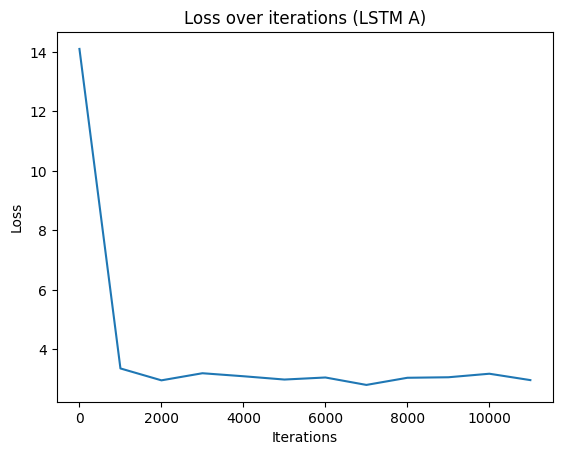

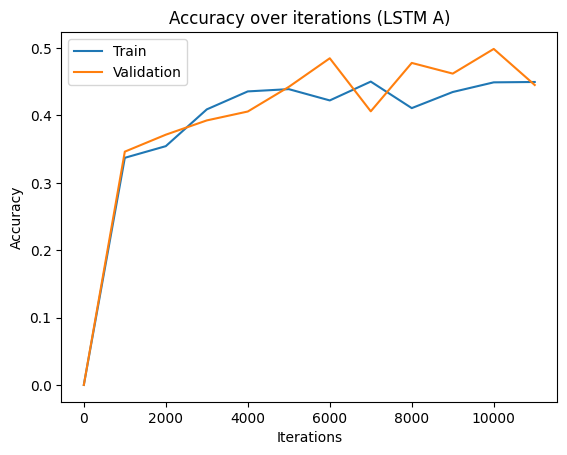

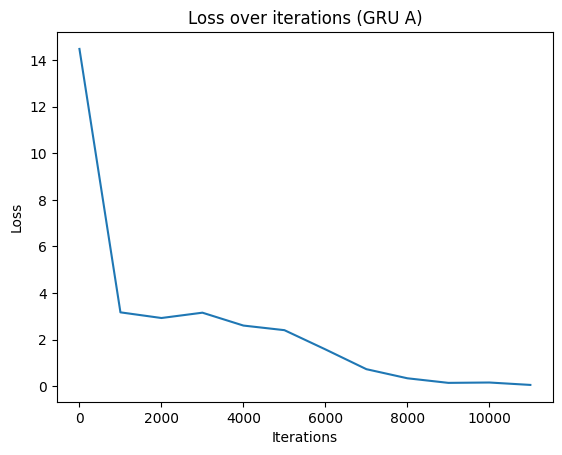

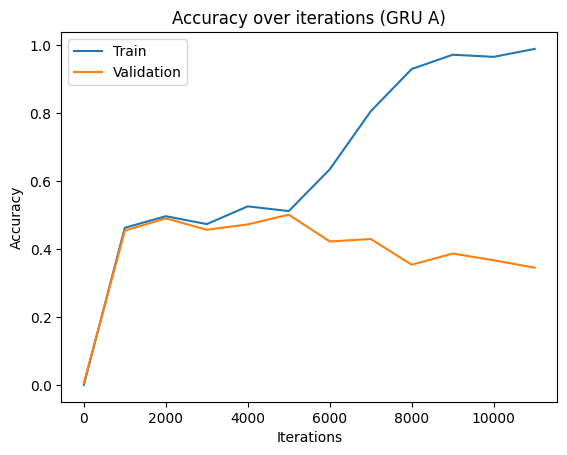

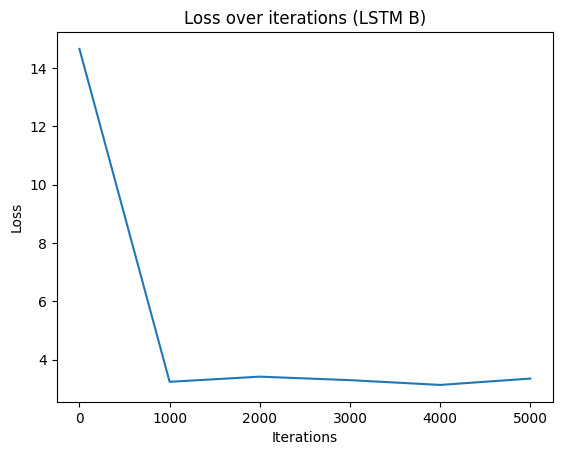

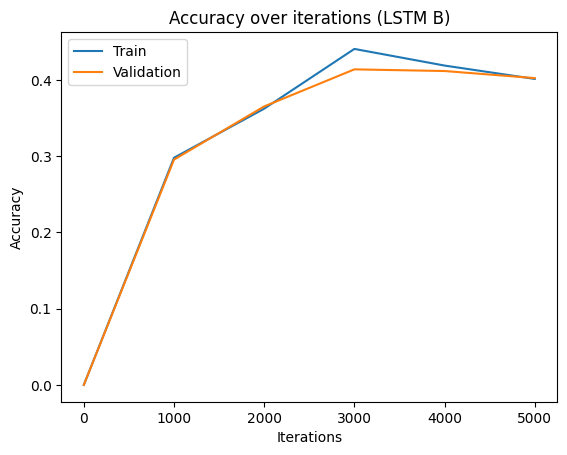

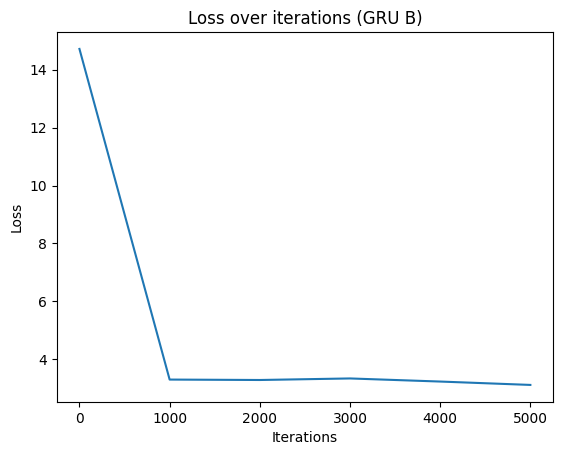

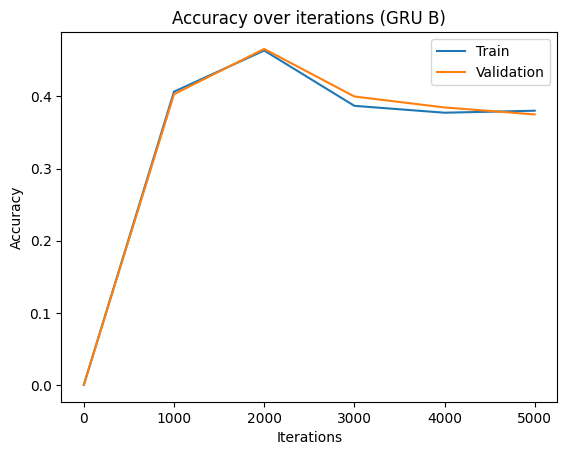

In [19]:
models_alt_rnn = []
for rnn_type, lr, bs, fp, pn in [
    ('LSTM', 1e-3, 32, 'lstm_lr=1e-3_bs=32', 'LSTM A'),
    ('GRU', 1e-3, 32, 'gru_lr=1e-3_bs=32', 'GRU A'),
    ('LSTM', 1e-3, 64, 'lstm_lr=1e-3_bs=64', 'LSTM B'),
    ('GRU', 1e-3, 64, 'gru_lr=1e-3_bs=64', 'GRU B')]:
    model_asr = ASR_Alt_RNN(rnn_type).to(device)
    train_model(model_asr, train_data_indices, val_data_indices, learning_rate=lr, batch_size=bs, file_prefix=fp, plot_every=1000, plot_name=pn)
    models_alt_rnn += [(pn, model_asr)]

0 Loss: 14.41389274597168 Train Acc: 0.00222717149220486 Val Acc: -0.0021505376344086446
2000 Loss: 3.187014102935791 Train Acc: 0.3355408388520972 Val Acc: 0.3522975929978118
4000 Loss: 3.155796766281128 Train Acc: 0.44759825327510916 Val Acc: 0.4510250569476082
6000 Loss: 2.464878559112549 Train Acc: 0.5023041474654377 Val Acc: 0.41457858769931666
8000 Loss: 2.1701133251190186 Train Acc: 0.5748898678414097 Val Acc: 0.4663341645885287
10000 Loss: 1.7950456142425537 Train Acc: 0.6115879828326181 Val Acc: 0.4282511210762332
12000 Loss: 1.2245081663131714 Train Acc: 0.7197149643705463 Val Acc: 0.3820754716981132
14000 Loss: 0.8554244637489319 Train Acc: 0.795774647887324 Val Acc: 0.37037037037037035
16000 Loss: 0.7612802982330322 Train Acc: 0.8129032258064516 Val Acc: 0.32499999999999996
18000 Loss: 0.4193464517593384 Train Acc: 0.9061784897025171 Val Acc: 0.38875878220140514
20000 Loss: 0.41461288928985596 Train Acc: 0.9035087719298246 Val Acc: 0.3785166240409207
22000 Loss: 0.330591738

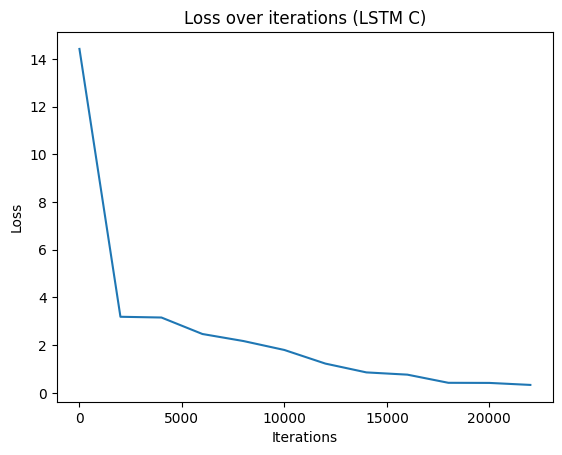

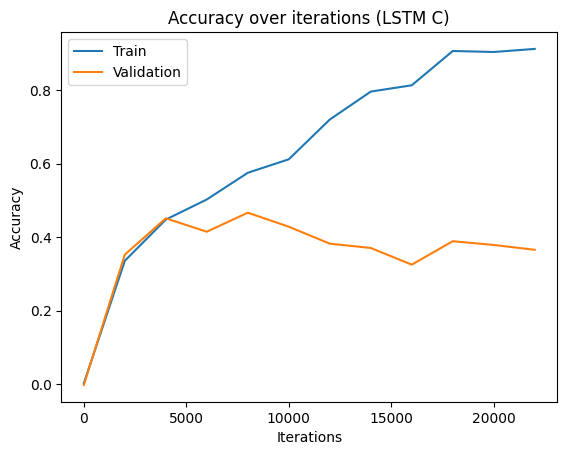

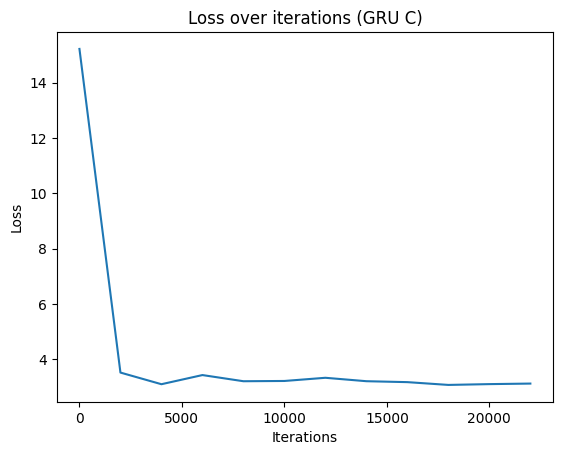

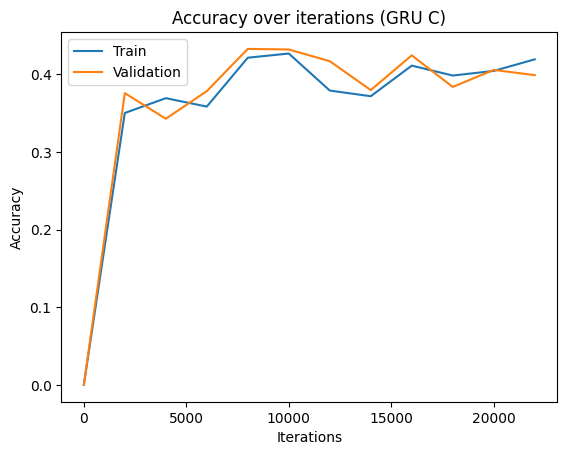

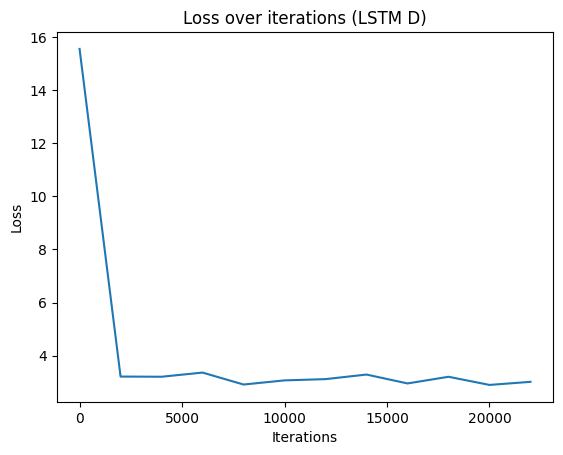

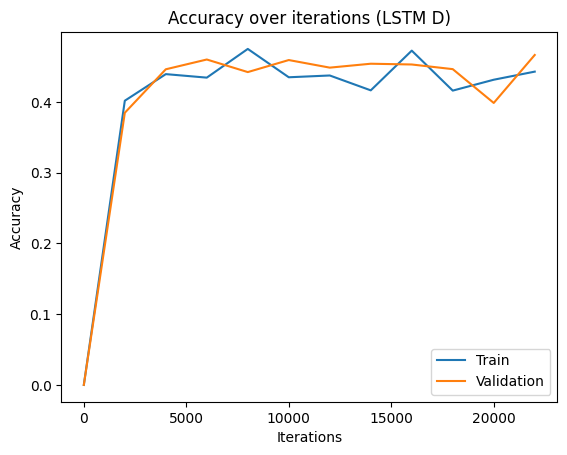

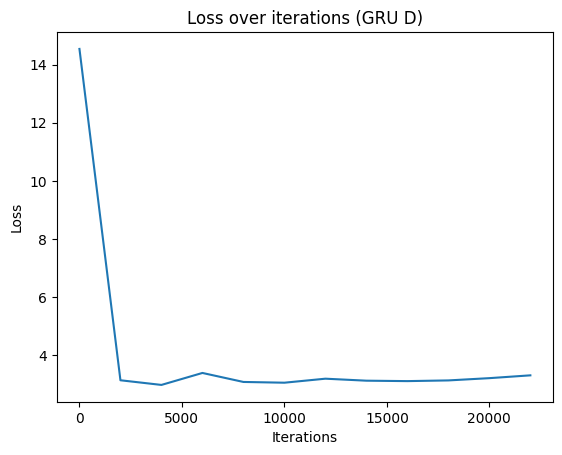

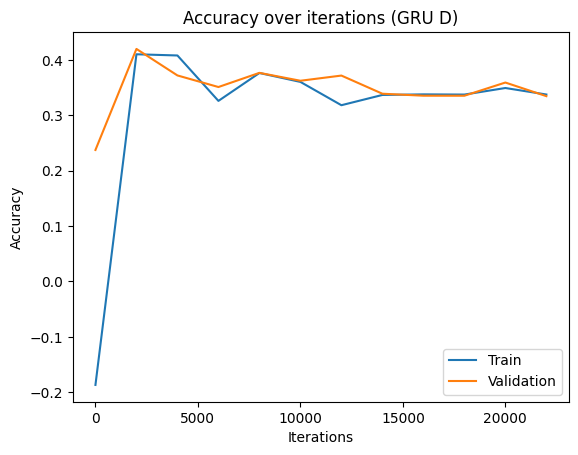

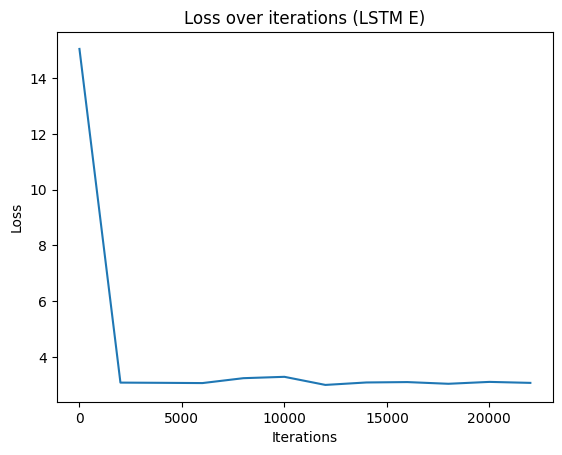

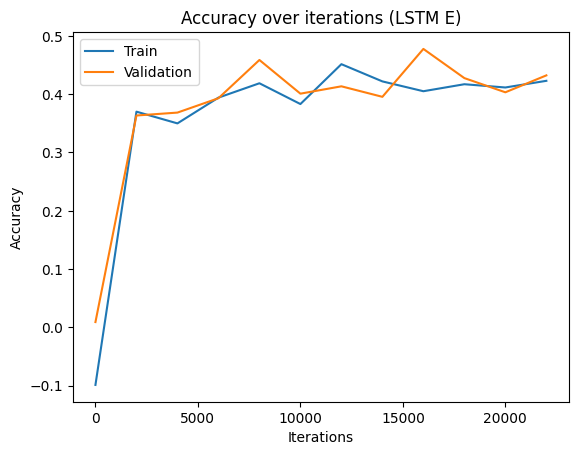

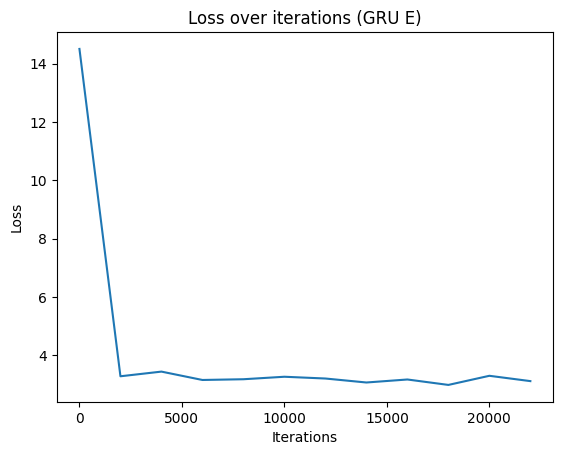

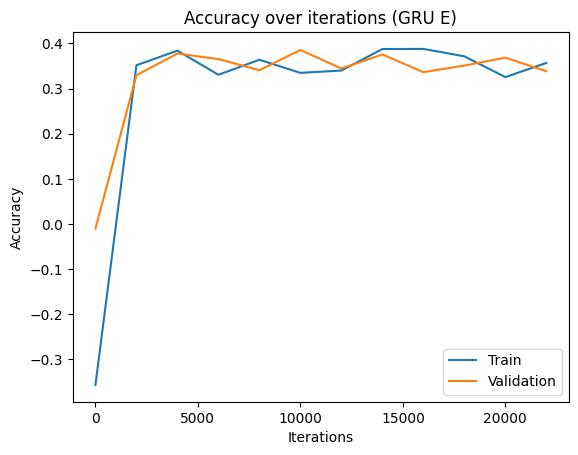

In [24]:
models_alt_rnn_with_dropout = []
for rnn_type, lr, bs, dr, fp, pn in [
    ('LSTM', 1e-3, 32, 0.25, 'lstm_lr=1e-3_bs=32_dr=0.25', 'LSTM C'),
    ('GRU', 1e-3, 32, 0.25, 'gru_lr=1e-3_bs=32_dr=0.25', 'GRU C'),
    ('LSTM', 1e-3, 32, 0.5, 'lstm_lr=1e-3_bs=32_dr=0.5', 'LSTM D'),
    ('GRU', 1e-3, 32, 0.5, 'gru_lr=1e-3_bs=32_dr=0.5', 'GRU D'),
    ('LSTM', 1e-3, 32, 0.75, 'lstm_lr=1e-3_bs=32_dr=0.75', 'LSTM E'),
    ('GRU', 1e-3, 32, 0.75, 'gru_lr=1e-3_bs=32_dr=0.75', 'GRU E')]:
    model_asr = ASR_Alt_RNN(rnn_type, dropout=dr).to(device)
    train_model(model_asr, train_data_indices, val_data_indices, learning_rate=lr, batch_size=bs, file_prefix=fp, plot_every=2000, plot_name=pn, num_epochs=90)
    models_alt_rnn_with_dropout += [(pn, model_asr)]

0 Loss: 14.798713684082031 Train Acc: -0.011363636363636465 Val Acc: 0.0022573363431150906
3000 Loss: 3.077503204345703 Train Acc: 0.36136363636363633 Val Acc: 0.34945054945054943
6000 Loss: 3.0863866806030273 Train Acc: 0.42334096109839814 Val Acc: 0.4116331096196868
9000 Loss: 3.2556188106536865 Train Acc: 0.3741794310722101 Val Acc: 0.3769751693002258
12000 Loss: 3.300018787384033 Train Acc: 0.33913043478260874 Val Acc: 0.32842105263157895
15000 Loss: 3.155129909515381 Train Acc: 0.43779904306220097 Val Acc: 0.41630901287553645
18000 Loss: 3.159330129623413 Train Acc: 0.3959731543624161 Val Acc: 0.4013452914798207
21000 Loss: 2.9767770767211914 Train Acc: 0.43333333333333335 Val Acc: 0.41630901287553645
24000 Loss: 2.9699487686157227 Train Acc: 0.3995726495726496 Val Acc: 0.44396551724137934
27000 Loss: 3.245028018951416 Train Acc: 0.4135667396061269 Val Acc: 0.42666666666666664
30000 Loss: 3.2116641998291016 Train Acc: 0.3887688984881209 Val Acc: 0.4416873449131513
33000 Loss: 3.17

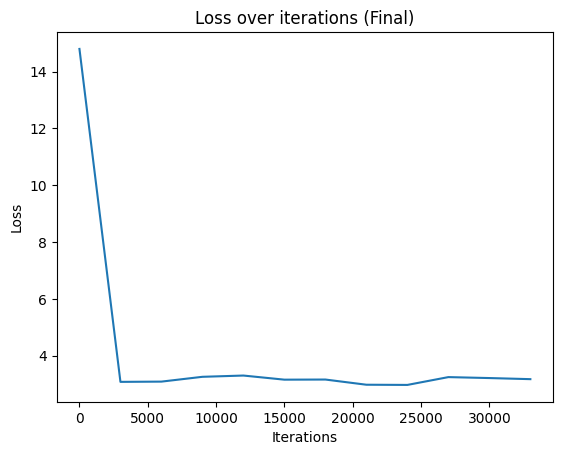

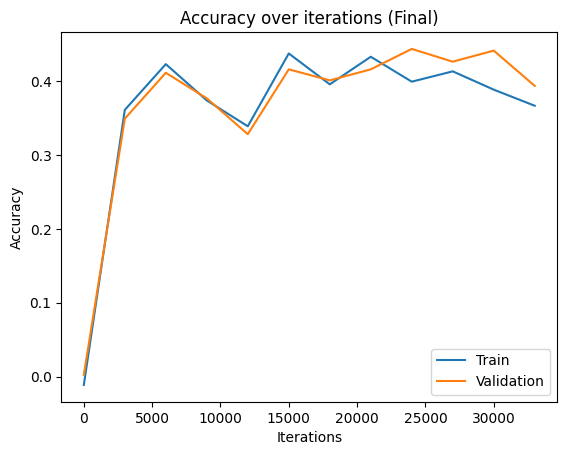

In [21]:
final_model = ASR_Alt_RNN("LSTM", dropout=0.5).to(device)
train_model(final_model, train_data_indices, val_data_indices, learning_rate=1e-3, batch_size=32, file_prefix='final_model', plot_every=3000, plot_name='Final', num_epochs=135)

In [ ]:
test_loader = torch.utils.data.DataLoader(test_data_indices,
                                          batch_size=32,
                                          collate_fn=collate_batch,
                                          shuffle=True)
acc = []
for images, labels, input_lengths, label_lengths in test_loader:
    z = final_model(images)
    acc += [images.shape[0] * compute_Wacc(z, labels, label_lengths) / len(test_data_indices)]

acc = sum(acc)
print(acc)

0.44097720772002724
